In [11]:
# Import Libraires
import tensorflow as tf
import matplotlib.pyplot as plt

In [12]:
# Building the model
batch_size=128          # We can adjust with different values such as, 32,64,128,256 etc.., Here we assigned 128 it means it will process the 128 images at once.
nb_classes=10           # Here, we assigned 10 number of classes 0 to 9.

# Dimension of input image (28x28 pixel)
image_rows,image_columns=28,28              # Here, we assigned the (28 x 28 pixel) for the input image.

# Load the data and split it into training and testing
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data()   # mnist means it is large database for the handwritten digit tasks.
                                                                              # It used to train & evaluate the image classification tasks.

# Reshaping the images into 4-D tensor (N images, 28 rows, 28 columns, 1 channel) - ( 28 x 28 x 1 = Grey Scale Image)

# Rescale the pixels ranges from [0,255] to [0,1]
X_train=X_train.reshape(X_train.shape[0],image_rows,image_columns,1)
X_test=X_test.reshape(X_test.shape[0],image_rows,image_columns,1)

# Converting it into Datatype floating
X_train=X_train.astype("float32")
X_test=X_test.astype("float32")

# Normalizing the values
X_train/=255
X_test/=255

# Printing the results
print("X_train shape:",X_train.shape)
print(X_train.shape[0],"training samples")
print(X_test.shape[0],"test samples")

# Converting digit lable (0-9) in one-hot encoded binary vectors.
# These are corresponded to the Training/Testing labels at output of the net.
Y_train=tf.keras.utils.to_categorical(y_train,nb_classes)
Y_test=tf.keras.utils.to_categorical(y_test,nb_classes)       # COnverted the categorical data into classes
print("One-Hot Encoding:{}".format(Y_train[0,:]))

X_train shape: (60000, 28, 28, 1)
60000 training samples
10000 test samples
One-Hot Encoding:[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


- By closely oberving on the above results we have 60,000 images for training.and 10,000 images for testing.

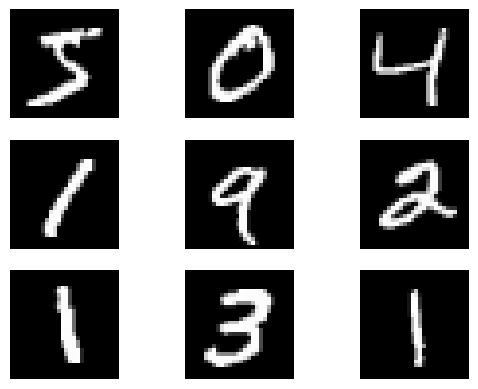

In [13]:
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[i,:,:,0],cmap="gray")
  plt.axis("off")

- In the above we plotted the image for checking the some random images in training data.

# **Building the Convolution Neural Network Model**

- In neural network keras library provides the two main ways to build the model one is sequential and function API.

- Here, we will proceed with Sequential model.

In [14]:
# Building the Sequential Model
model=tf.keras.Sequential()

# 2-D Convolution (Number_Filters, Kernel_Size, Input_Shape=(number_channels,img_col),padding,activation)
model.add(tf.keras.layers.Conv2D(6,(5,5),input_shape=[image_rows,image_columns,1],padding="same",activation="tanh"))
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2)))        # Applying the Average 2dimensional pooling
model.add(tf.keras.layers.Conv2D(16,(5,5),padding="valid",activation="tanh"))
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(120,activation="tanh"))
model.add(tf.keras.layers.Dense(84,activation="tanh"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))  # For multiclass classification we can use the "SOFTMAX" activation function


Notes:

- Applying the 2-Dimensional convolution on the model.

- 5 x 5 filter size,applying 6 filters.

- Padding= same means, We gave the image size is 28 x 28 after applying convolution the same size if we want, we can give the padding =same.

- Padding=valid, It means We gave the image size is 28 x 28 after applying convolution, we do not want to get the same size we can give the padding=valid.


In [15]:
# Compiling the model
model.compile(loss="categorical_crossentropy",optimizer="adadelta",metrics=["accuracy"])

In [16]:
# Adjusting the no.of epochs is 30
nb_epochs=30

# Fitting the model on Training & Testing
model.fit(X_train,Y_train,batch_size=batch_size,epochs=nb_epochs,verbose=1,validation_data=(X_test,Y_test))

# Evaluating the model
score=model.evaluate(X_test,Y_test,verbose=0)
print("Test Score",score[0])
print("Test Accuracy",score[1])


Epoch 1/30
469/469 [==============================] - 35s 73ms/step - loss: 2.2808 - accuracy: 0.1062 - val_loss: 2.2561 - val_accuracy: 0.1699
Epoch 2/30
469/469 [==============================] - 37s 78ms/step - loss: 2.2280 - accuracy: 0.2325 - val_loss: 2.1998 - val_accuracy: 0.2939
Epoch 3/30
469/469 [==============================] - 34s 72ms/step - loss: 2.1715 - accuracy: 0.3355 - val_loss: 2.1397 - val_accuracy: 0.3822
Epoch 4/30
469/469 [==============================] - 42s 89ms/step - loss: 2.1106 - accuracy: 0.4303 - val_loss: 2.0748 - val_accuracy: 0.4883
Epoch 5/30
469/469 [==============================] - 40s 86ms/step - loss: 2.0449 - accuracy: 0.5265 - val_loss: 2.0048 - val_accuracy: 0.5706
Epoch 6/30
469/469 [==============================] - 35s 74ms/step - loss: 1.9735 - accuracy: 0.5900 - val_loss: 1.9285 - val_accuracy: 0.6225
Epoch 7/30
469/469 [==============================] - 33s 71ms/step - loss: 1.8959 - accuracy: 0.6304 - val_loss: 1.8462 - val_accuracy:

## Predicting the model

1/1 [==============================] - 0s 82ms/step


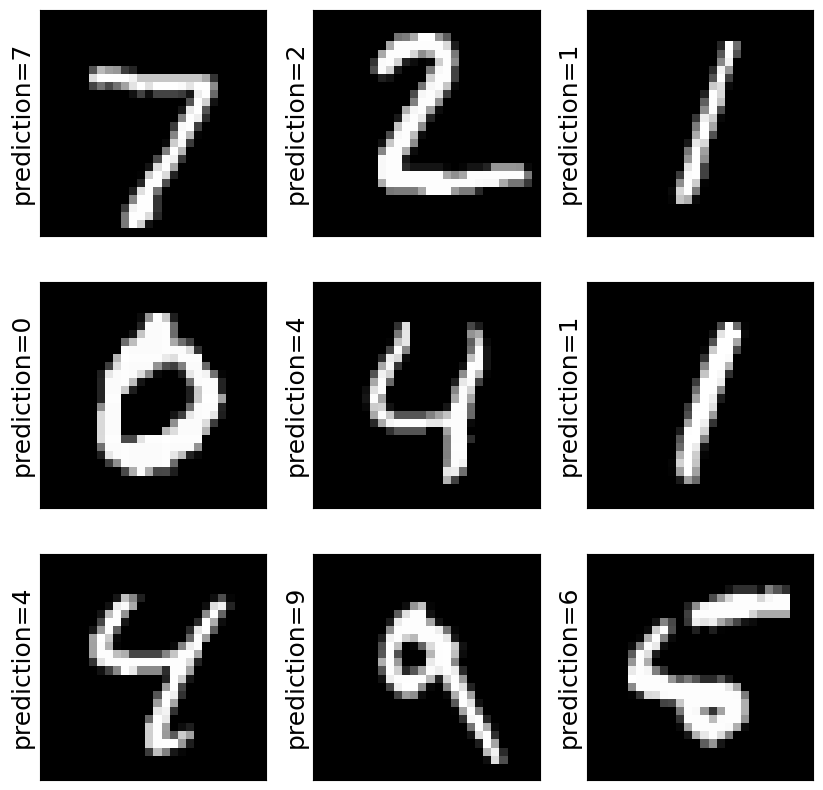

In [17]:
import numpy as np
res=np.argmax(model.predict(X_test[:9]),axis=-1)
plt.figure(figsize=(10,10))

for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(X_test[i,:,:,0],cmap="gray")
  plt.gca().get_xaxis().set_ticks([])
  plt.gca().get_yaxis().set_ticks([])
  plt.ylabel("prediction={}".format(res[i]),fontsize=18)

- In the above we predicted the model by taking some random 9 images what we have given to the model and it will predicting from testing dataset.

- In prediction result we can able to see that there is some unaccurate results we can rectify that unaccurate results by using the following methods.

- We can fine tune the model by experimenting with different optimizers like adam.

- We change it into more epochs.

- Incresing the bactch size

- Changing the activation fucntion.

- Finally, we will get the accurate results.